## Skill-Assessment Exercise 10.8

Given the system shown in Figure 10.10, where

$$
G(s) = \frac{8000}{(s+5)(s+20)(s+50)}
$$

plot the closed-loop log-magnitude and phase frequency response plots using the following methods:

#### PART A: M and N Circles

If the circles and G(jw) are to be drawn by hand, it's a good idea to format G(jw) in cartesian form, e.g. G(jw) = Re + Im. Then only a number of G(jw) values need to be computed to draw the general curve.

Substituting $s = j\omega$ into $G(s)$

$$
G(j\omega) = \frac{8000}{(j\omega+5)(j\omega+20)(j\omega+50)}
$$

After expansion and simplification

$$
G(j\omega) = \frac{8000}{(5000-75\omega^{2})+(1350\omega-\omega^{3})j}
$$

A common technique to force the denominator to be real is to multiply by the denominator's complex conjugate.

$$
\frac{8000}{(5000-75\omega^{2})+(1350\omega-\omega^{3})j} \cdot \frac{(5000-75\omega^{2})-(1350\omega-\omega^{3})j}{(5000-75\omega^{2})-(1350\omega-\omega^{3})j}
$$

After simplifying this monstrosity, the result is

$$
G(j\omega) = 8000\frac{(5000-75\omega^{2}) + \omega(\omega^{2}-1350)j}{\omega^{6}+2925\omega^{4}+1072500\omega^{2}+25000000}
$$

While not in the exact form, this is equivalent to what's in the solutions manual.

However, since software is being used to generate the plots, one can use the original $G(j\omega)$ since software can easily break the complex values into real and imaginary.

Below is a Python script to plot $G(j\omega)$ and M and N circles.

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Make interactable plots
%matplotlib ipympl

# Compute G(jw) and generate M and N circles 
w = np.arange(0,1000,0.1)                           # Create vector from 0 to 10 with spacing 0.1
numg = 8000                                         # Numerator of G(jw)
deng = (1j*w+5)*(1j*w+20)*(1j*w+50)                 # Denominator of G(jw)
G   = numg/deng                                     # Using original G(jw) here. Can also use the "simplified" G(jw)

# Plot G(jw)
fig = plt.figure(1)                                 # Create figure 1
ax = fig.add_axes([0.1,0.1,0.8,0.8])                # Create axis object
ax.plot(G.real, G.imag, color='dodgerblue', linewidth=2)   # Plot complex values of G(jw)
ax.set_aspect('equal', adjustable='box')            # So circles don't appear distorted
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('G(jw), M, and N Circles')
ax.grid(True)

# Compute and plot M circles
M_center_y = 0                                      # all y-coordinates of M circles are the same
M = np.array([0.4, 0.5, 0.6, 0.7, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0]) # M values the book uses for M circles. See Fig 10.42
M_radius = M / (M**2-1)
M_center_x = (-M**2) / (M**2 -1)                    # x-coordinates of M circles
for center_x, radius in zip(M_center_x, M_radius):
    circle = patches.Circle((center_x, M_center_y), radius, fill=False, edgecolor='silver', linewidth=1)
    ax.add_patch(circle)

# Compute and plot N circles
N_center_x = -0.5                                   # all x-coordinates of N circles are the same
N_degs_pos = np.array([20, 25, 30, 40, 50, 70])     # positive degree values the book uses for N circles. See Fig 10.43
N_degs_neg = -N_degs_pos                            # negative degree values the book uses for N circles
N_degs = np.concatenate((N_degs_neg, N_degs_pos))
N = np.tan(N_degs*np.pi/180)                        # compute N values
N_radius = np.sqrt(N**2+1) / (2*N)                  # compute radii. From Eq. 10.64
N_center_y = 1 / (2*N)                              # y-coordinates of N circles
for center_y, radius in zip(N_center_y, N_radius):
    circle = patches.Circle((N_center_x, center_y), radius, fill=False, edgecolor='gray', linewidth=1)
    ax.add_patch(circle)

del w, numg, deng, G, fig, ax, M, M_center_x, M_center_y, M_radius, N, N_center_x, N_center_y, N_radius, \
    N_degs_pos, N_degs_neg, N_degs

#### PART B: Nichols chart

This section is not complete. The Nichols chart is plotted, so phase and magnitude response of the _closed-loop_ system is now known, but the frequency for each (phase, magnitude) point isn't shown on the Nichols chart. Thus, currently the mag and phase freq response plots (e.g. Bode plots) for the _closed-loop_ system can't be drawn since the frequency points aren't known.

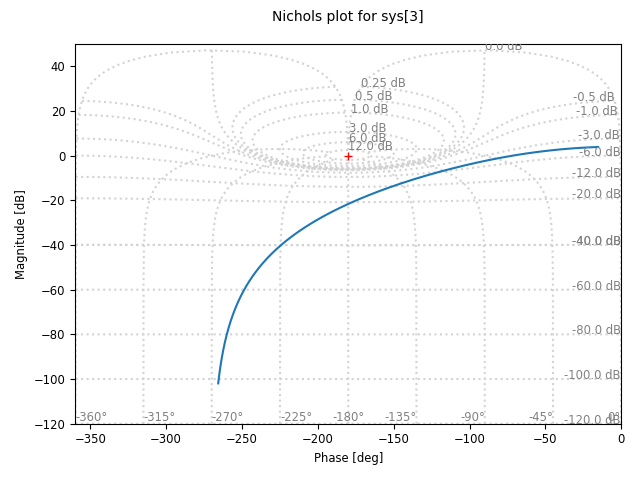

In [ ]:
# Import libaries
import control as ct
# # REMOVE FOLLOWING LINES ONCE DEBUGGED
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib ipympl

numg = [8000]
deng = np.poly([-5,-20,-50])
G = ct.tf(numg, deng)

fig = plt.figure(2)
ax = fig.add_axes([0.1,0.1,0.8,0.8])                # Create axis object
# ax.set_xlim(-0.025, 0.135) # Set x axis limits
ct.nichols_plot(G)

# Clean up workspace
del numg, deng, G, fig, ax

However, viewing the Bode plots in the solutions manual, you can see how the phase and magnitude of the Nichols chart above maps to the Bode plots.

Viewing the Nichol's chart, where the open-loop G(jw) curve (blue) crosses the gray dotted lines is the _closed-loop_ response.

For example, the blue curve crosses where the gray-dotted curves of -6dB and -90 deg meet. Viewing the Bode plot in the solutions manual, while difficult to tell, -6dB in the magnitude plot and -90 deg in the phase plot appear to align around $\omega \approx 10.25 rad/s$.

Some more example points: \
In the Nichol's chart, the blue curve crosses where the gray -20dB and -180 deg meet, meaning the closed-loop response at -20dB will also have -180 deg phase shift, whatever this frequency may be. Viewin the solutions manual Bode plots, the magnitude is -20 dB and the phase is -180 deg at the same frequency, which here is $\omega \approx 35 rad/s$.

Repeating the above process, the blue open-response curve crosses the dotted gray lines of -40dB and -225deg meet, meaning the closed response will have -40dB mag and -225deg phase at the same frequency. Viewing the solutions manual Bode plot, -40dB and -225deg occur at $\omega \approx 90 rad/s$.